In [2]:
# importing the neccessary libraries used in this project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
successfully deleted duplicate values.
show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in          

/tmp/ipykernel_2487/3964393731.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year.index,y=year.values,palette='Set2')


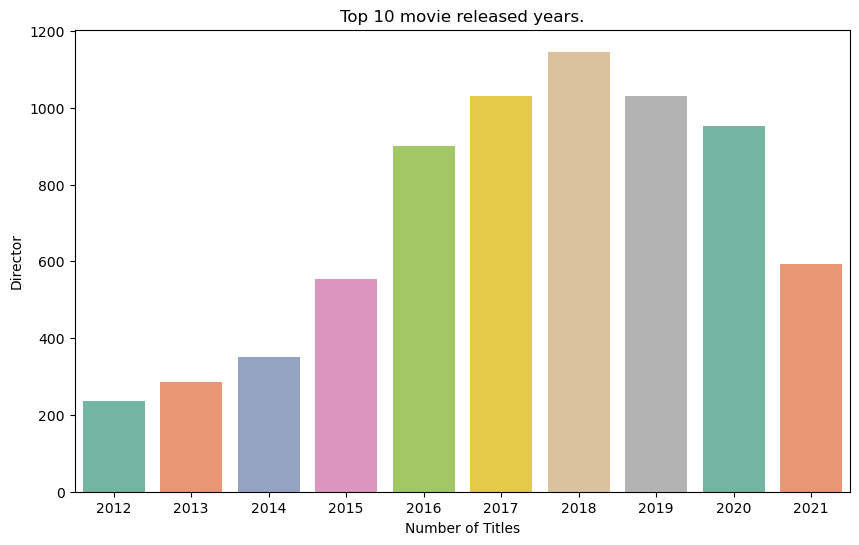

/tmp/ipykernel_2487/3964393731.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index,y=type_counts.values,palette='Set1')


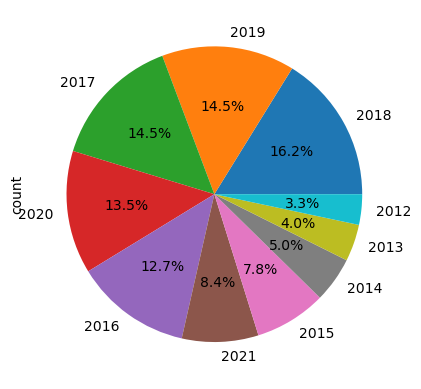

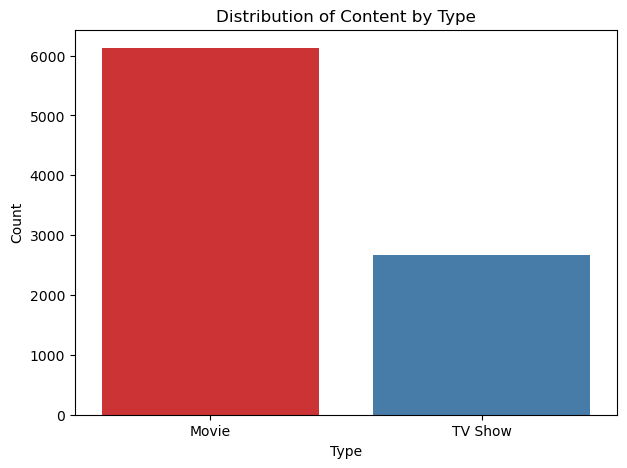

<Axes: ylabel='count'>

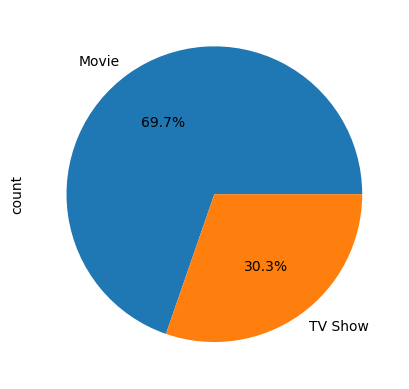

In [3]:
#uploading the netflix data.
data = pd.read_csv('/home/vinayyadav/Documents/netflix1.csv')
data

# finding the basic iformation about our data.
data.info()
data.size

# looking for the null values if any.
data.isnull().value_counts()

# deleting any duplicates values if any.
data= data.drop_duplicates()
print("successfully deleted duplicate values.")

# Printing the first five rows of the data.
data.head(5)

# Convert 'date_added' to datetime.
data['date_added'] = pd.to_datetime(data['date_added'])
print(data.dtypes)

# printing the top 10 movie released year.
year = data.release_year.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=year.index,y=year.values,palette='Set2')
plt.title('Top 10 movie released years.')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()
#plt.pie(year[:7],autopct ='%1.1f%%')
#plt.title("Count")
year.plot(kind = 'pie',autopct ='%1.1f%%')

# printing the number of Movies and TV Shows
type_counts = data['type'].value_counts()
plt.figure(figsize=(7,5))
sns.barplot(x=type_counts.index,y=type_counts.values,palette='Set1')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
type_counts.plot(kind = 'pie',autopct ='%1.1f%%')


listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64
genre_list are printed successfully


/tmp/ipykernel_2487/1337593330.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_list.values,y=genre_list.index,palette='Set3')


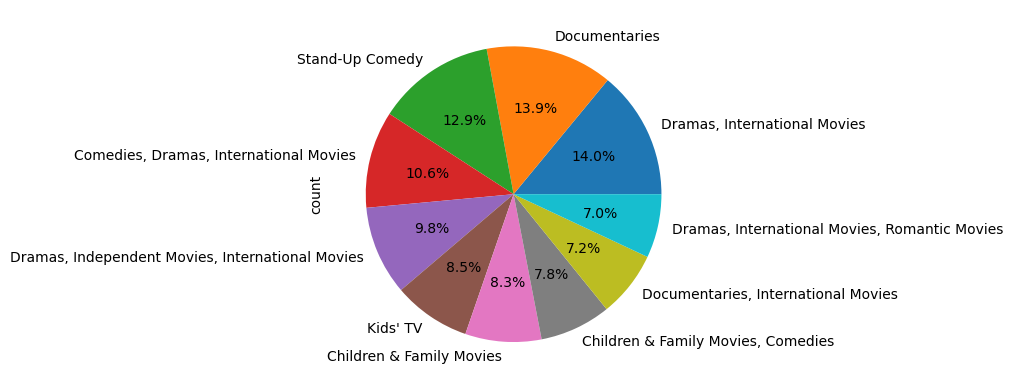

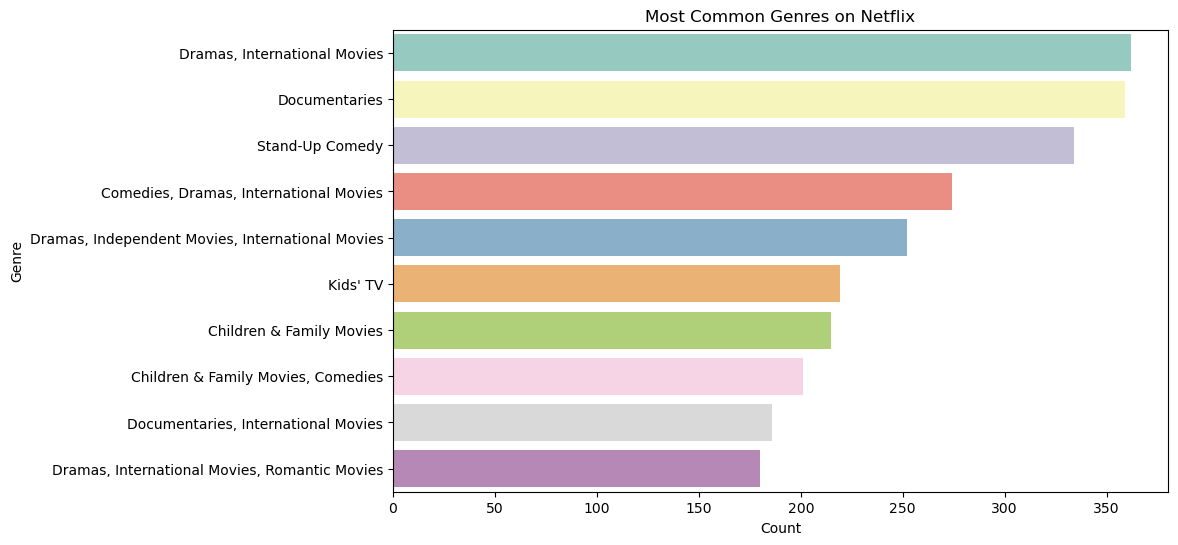

In [15]:
# printing the most common genres on netflix.
genre_list= data.listed_in.value_counts().head(10)
print(genre_list)
print("genre_list are printed successfully")
genre_list[:10].plot(kind = 'pie',autopct ='%1.1f%%')


plt.figure(figsize=(10, 6))
sns.barplot(x=genre_list.values,y=genre_list.index,palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


<Axes: xlabel='rating'>

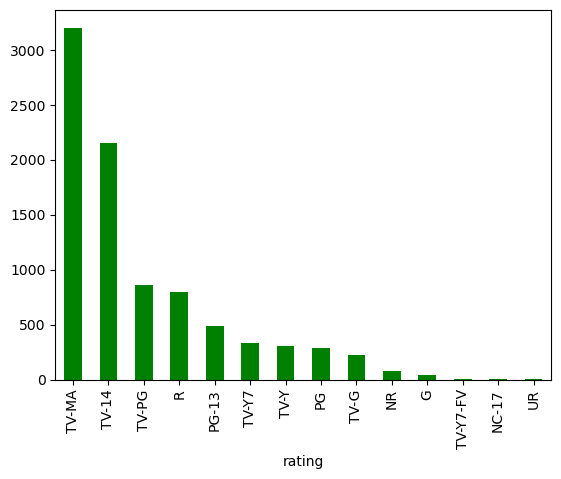

In [5]:
#printing the rating of the content on netflix.
rating = data.rating.value_counts()
print(rating)
rating = data.rating.value_counts()
rating.plot(kind = 'bar',color="green")

director
Not Given                 2588
Rajiv Chilaka               20
Raúl Campos, Jan Suter      18
Alastair Fothergill         18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Youssef Chahine             12
Martin Scorsese             12
Jay Chapman                 12
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Directors with the Most Titles'}, xlabel='director', ylabel='Count'>

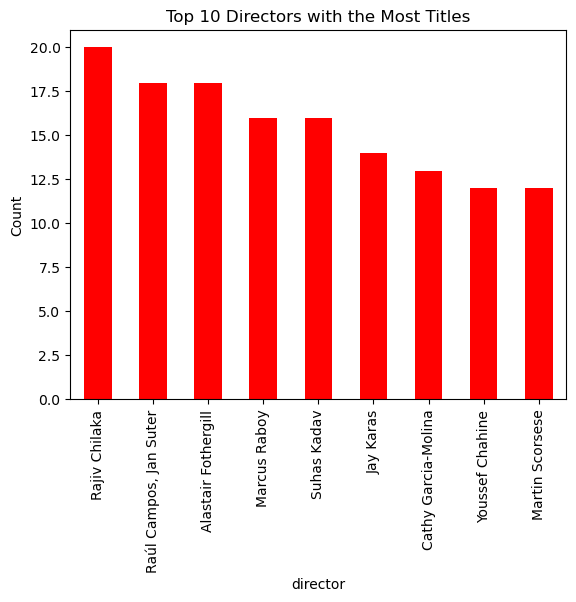

In [6]:
# printing the top 10 directors on netflix.
top_directors = data['director'].value_counts().head(11)
print(top_directors)
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Dicertor')
plt.ylabel('Count')
top_directors[1:10].plot(kind = 'bar',color='red')

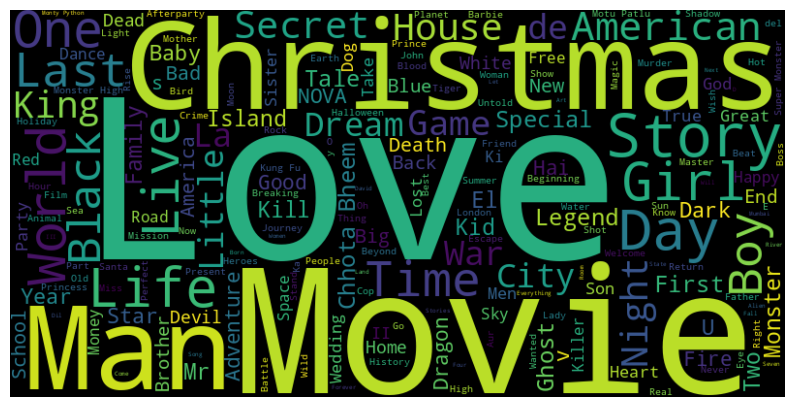

In [8]:
# Generating the word cloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud=WordCloud(width=800,height=400,background_color='black').generate(' '.join(movie_titles))
# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Countries with most movies.'}, xlabel='country', ylabel='Count'>

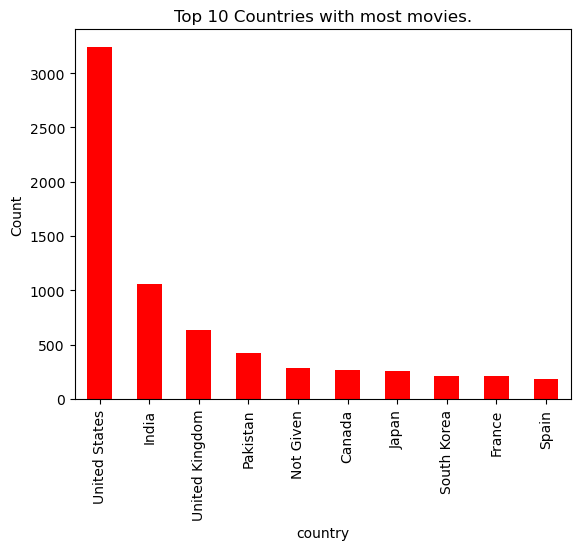

In [14]:
# Top 10 countries with the most movies on netflix.
top_countries = data['country'].value_counts().head(10)
print(top_countries)
plt.title('Top 10 Countries with most movies.')
plt.ylabel('Count')
top_countries.plot(kind = 'bar',color='red')